In [11]:
import mpmath as mp
import numpy as np
import matplotlib.pyplot as plt
from pymatgen import MPRester
from pymatgen import Structure

In [12]:
#Téléchargement du fichier CIF
API_KEY = "903fk7jExqhMBNCB46b"
MP = "mp-862947"
mpr = MPRester(API_KEY)
structure = mpr.get_structure_by_material_id(MP, conventional_unit_cell = True)
#structureprimitive = SpacegroupAnalyzer(structure).get_primitive_standard_structure()
structure.to(filename="mp-862947.cif")

In [13]:
l = 1.54060
dhkl = np.array([structure.lattice.d_hkl(hkl) for hkl in [(1,0,0), (0,0,2), (1,1,0)]])

angles = []
for n in range(1, 4):
    for i, hkl in enumerate([(1,0,0), (0,0,2), (1,1,0)]):
        theta = mp.asin(n * l / (2 * dhkl[i]))
        angle_deg = mp.degrees(theta)
        angles.append((hkl, n, angle_deg))

angles = sorted(angles, key=lambda x: x[2])

# Afficher les 3 premiers pics de diffraction
for hkl, n, angle_deg in angles[:3]:
    print(f"Pic de diffraction: {hkl} (ordre {n}), angle = {mp.nstr(angle_deg, 2)} degrés")

Pic de diffraction: (1, 0, 0) (ordre 1), angle = 5.2 degrés
Pic de diffraction: (1, 1, 0) (ordre 1), angle = 7.4 degrés
Pic de diffraction: (0, 0, 2) (ordre 1), angle = 11.0 degrés


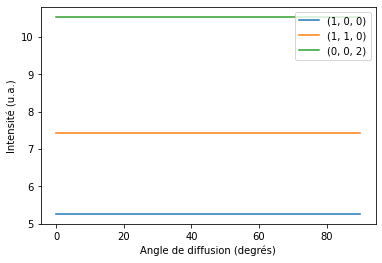

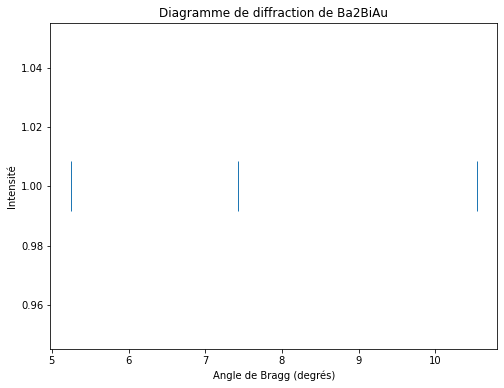

In [14]:
# Paramètres cristallins
a = 8.42375800
b = 8.42375800
c = 8.42375800
alpha = 90.00000000
beta = 90.00000000
gamma = 90.00000000

l = 1.5406

def bragg_angle(n, d):
    return np.degrees(np.arcsin(n * l / (2 * d)))

# Calcul des distances interplanaires d_hkl
d_100 = a / np.sqrt(1**2)
d_110 = a / np.sqrt(1**2 + 1**2)
d_002 = c / np.sqrt(2**2)

# Calcul des angles de Bragg
angles = np.linspace(0, 90, 1000)
bragg_100 = bragg_angle(1, d_100)
bragg_110 = bragg_angle(1, d_110)
bragg_002 = bragg_angle(1, d_002)

plt.plot(angles, np.ones_like(angles) * bragg_100, label='(1, 0, 0)')
plt.plot(angles, np.ones_like(angles) * bragg_110, label='(1, 1, 0)')
plt.plot(angles, np.ones_like(angles) * bragg_002, label='(0, 0, 2)')
plt.xlabel('Angle de diffusion (degrés)')
plt.ylabel('Intensité (u.a.)')
plt.legend()
plt.show()


# Paramètres du cristal
hkl = [(1, 0, 0), (1, 1, 0), (0, 0, 2)]  
theta = []  

# Calcul des angles de Bragg pour chaque plan 
for i in range(len(hkl)):
    d = a / np.sqrt(hkl[i][0]**2 + hkl[i][1]**2 + hkl[i][2]**2) 
    theta.append(np.degrees(np.arcsin(l / (2 * d))))  

plt.figure(figsize=(8,6))
plt.plot(theta, [1]*len(theta), '|', markersize=50)
plt.xlabel('Angle de Bragg (degrés)')
plt.ylabel('Intensité')
plt.title('Diagramme de diffraction de ' + 'Ba2BiAu')
plt.show()